In [1]:
%matplotlib inline

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import pickle
import os
import sigfig

In [17]:
file_name = 'C:\\Users\\John\\Documents\\Research\\ML_Gravity\\sh_stats_full_grid.data'

with open(file_name, 'rb') as f:
    df = pickle.load(f)

nn_data_name = 'C:\\Users\\John\\Documents\\Research\\ML_Gravity\\continuous_results.data'

with open(nn_data_name, 'rb') as f:
    nn_df = pickle.load(f)
os.makedirs("C:\\Users\\John\\Documents\\Research\\ML_Gravity\\Plots\\World\\", exist_ok=True)

In [19]:
nn_df.iloc[-8:]#[nn_df['N_train'] == 40000][nn_df['PINN_flag'] == False][nn_df['epochs'] == 200000].iloc[-1].name

,PINN_flag,N_train,degree,layers,epochs,params,trajectory,radius_min,radius_max,train_time,...,sigma_5_c_mean,sigma_5_c_std,sigma_5_c_median,max_error,sigma_2_mean,sigma_2_std,sigma_2_median,sigma_2_c_mean,sigma_2_c_std,sigma_2_c_median
timetag,,,,,,,,,,,,,,,,,,,,,
Tue Nov 3 07:21:26 2020,True,40000,1000,"[3, 40, 40, 40, 40, 40, 40, 40, 40, 4]",200000,11804,RandomDist,6378136.6,6378146.6,8366.51,...,NaN,NaN,NaN,0.007973,0.001101,0.000510,0.001023,0.000193,0.000147,0.000151
Tue Nov 3 08:03:18 2020,False,40000,1000,"[3, 40, 40, 40, 40, 40, 40, 40, 40, 4]",200000,11804,RandomDist,6378136.6,6378146.6,2497.30,...,NaN,NaN,NaN,0.008564,0.000953,0.000567,0.000854,0.000173,0.000148,0.000130
Tue Nov 3 10:36:58 2020,True,40000,1000,"[3, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40...",200000,18364,RandomDist,6378136.6,6378146.6,9192.73,...,NaN,NaN,NaN,0.007496,0.001185,0.000504,0.001091,0.000210,0.000148,0.000172
Tue Nov 3 11:16:52 2020,False,40000,1000,"[3, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40...",200000,18364,RandomDist,6378136.6,6378146.6,2377.22,...,NaN,NaN,NaN,0.008099,0.000995,0.000622,0.000867,0.000177,0.000161,0.000130
Tue Nov 3 13:27:34 2020,True,40000,1000,"[3, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40...",200000,18364,RandomDist,6378136.6,6378146.6,7815.27,...,NaN,NaN,NaN,0.007972,0.001015,0.000601,0.000898,0.000177,0.000159,0.000132
Tue Nov 3 14:17:27 2020,False,40000,1000,"[3, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40...",200000,18364,RandomDist,6378136.6,6378146.6,2976.08,...,NaN,NaN,NaN,0.007704,0.001056,0.000569,0.000946,0.000181,0.000157,0.000135
Tue Nov 3 18:23:17 2020,True,120000,1000,"[3, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40...",200000,18364,RandomDist,6378136.6,6378146.6,14713.41,...,NaN,NaN,NaN,0.007906,0.001145,0.000519,0.001044,0.000259,0.000153,0.000228
Tue Nov 3 19:47:46 2020,False,120000,1000,"[3, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40...",200000,18364,RandomDist,6378136.6,6378146.6,5047.48,...,NaN,NaN,NaN,0.007300,0.000983,0.000509,0.000902,0.000175,0.000144,0.000133


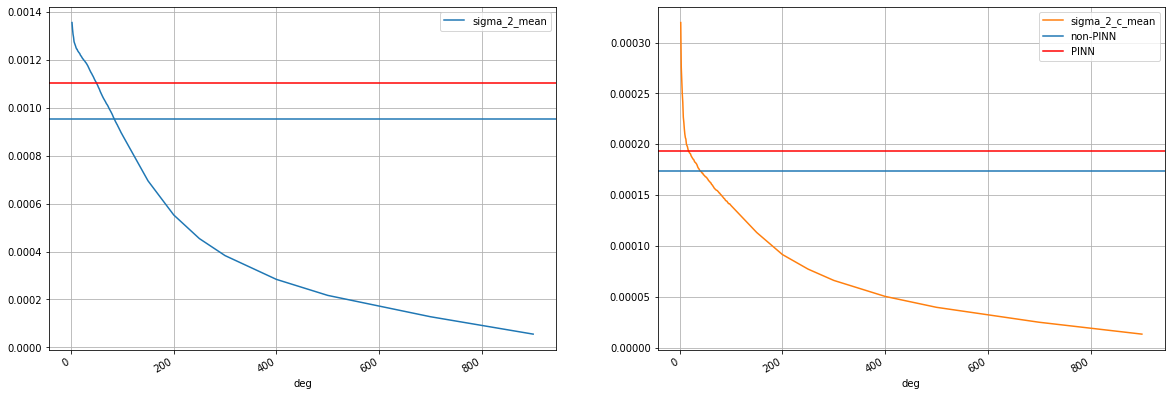

In [12]:
#Wider 
scale = 2
axes = df.plot(x=None, y=['sigma_2_mean', 'sigma_2_c_mean'],  subplots=True, layout=(1,2), figsize=(10*scale, 3.5*scale), grid=True)

data = nn_df.loc['Tue Nov  3 08:03:18 2020']

axes[0][0].axhline(y=data['sigma_2_mean'], label='non-PINN') 
axes[0][1].axhline(y=data['sigma_2_c_mean'], label='non-PINN') 


data = nn_df.loc['Tue Nov  3 07:21:26 2020']

axes[0][0].axhline(y=data['sigma_2_mean'], label='PINN', c='r') 
axes[0][1].axhline(y=data['sigma_2_c_mean'], label='PINN', c='r') 

plt.legend()


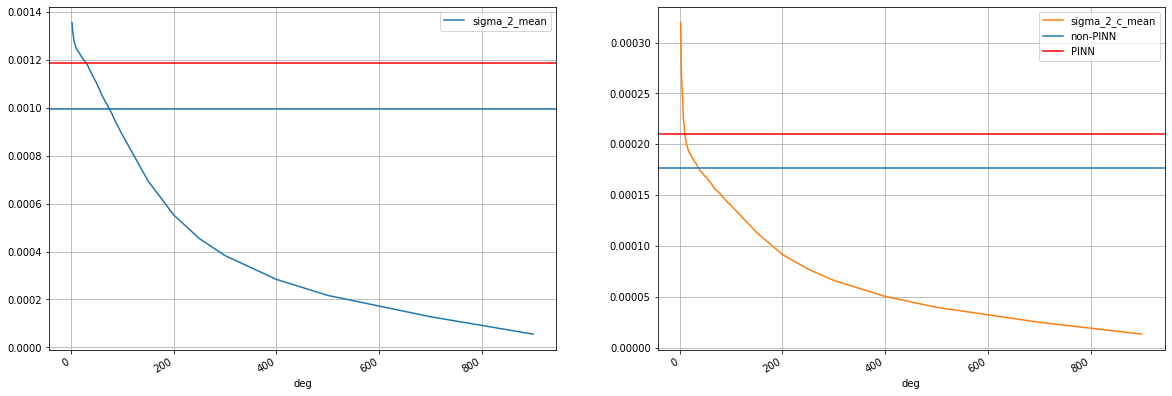

In [13]:
#Deeper
scale = 2
axes = df.plot(x=None, y=['sigma_2_mean', 'sigma_2_c_mean'],  subplots=True, layout=(1,2), figsize=(10*scale, 3.5*scale), grid=True)

data = nn_df.loc['Tue Nov  3 11:16:52 2020']


axes[0][0].axhline(y=data['sigma_2_mean'], label='non-PINN') 
axes[0][1].axhline(y=data['sigma_2_c_mean'], label='non-PINN') 

data = nn_df.loc['Tue Nov  3 10:36:58 2020']


axes[0][0].axhline(y=data['sigma_2_mean'], label='PINN', c='r') 
axes[0][1].axhline(y=data['sigma_2_c_mean'], label='PINN', c='r') 

plt.legend()


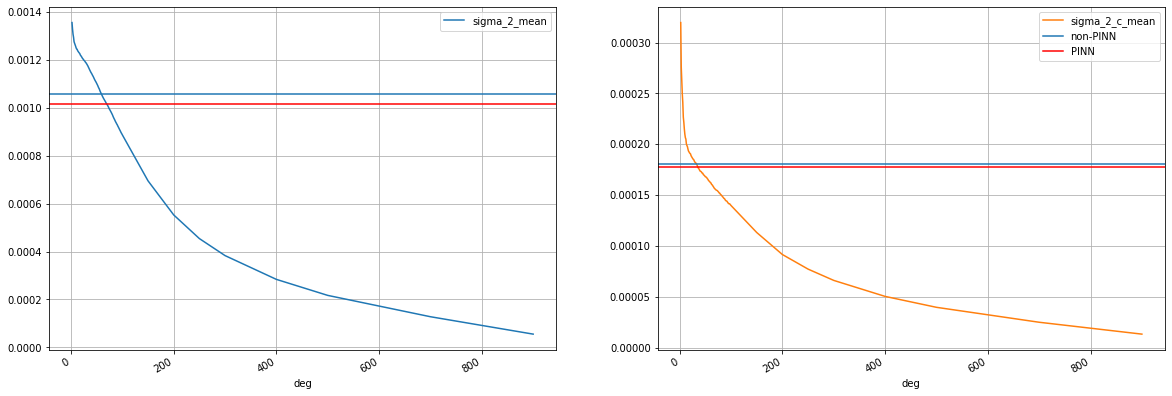

In [16]:
# Relu
scale = 2
axes = df.plot(x=None, y=['sigma_2_mean', 'sigma_2_c_mean'],  subplots=True, layout=(1,2), figsize=(10*scale, 3.5*scale), grid=True)

data = nn_df.loc['Tue Nov  3 14:17:27 2020']


axes[0][0].axhline(y=data['sigma_2_mean'], label='non-PINN') 
axes[0][1].axhline(y=data['sigma_2_c_mean'], label='non-PINN') 

data = nn_df.loc['Tue Nov  3 13:27:34 2020']


axes[0][0].axhline(y=data['sigma_2_mean'], label='PINN', c='r') 
axes[0][1].axhline(y=data['sigma_2_c_mean'], label='PINN', c='r') 

plt.legend()

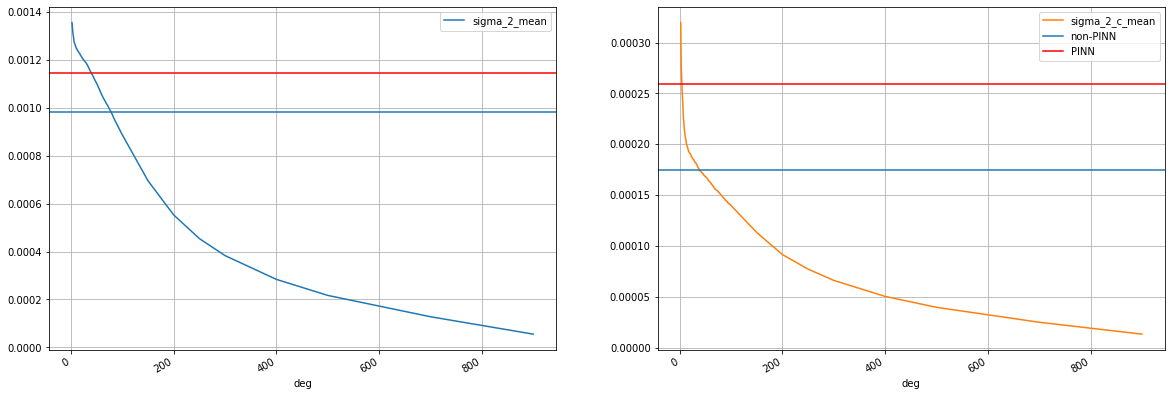

In [21]:
# More Data
scale = 2
axes = df.plot(x=None, y=['sigma_2_mean', 'sigma_2_c_mean'],  subplots=True, layout=(1,2), figsize=(10*scale, 3.5*scale), grid=True)

data = nn_df.loc['Tue Nov  3 19:47:46 2020']

axes[0][0].axhline(y=data['sigma_2_mean'], label='non-PINN') 
axes[0][1].axhline(y=data['sigma_2_c_mean'], label='non-PINN') 


data = nn_df.loc['Tue Nov  3 18:23:17 2020']

axes[0][0].axhline(y=data['sigma_2_mean'], label='PINN', c='r') 
axes[0][1].axhline(y=data['sigma_2_c_mean'], label='PINN', c='r') 

plt.legend()